## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [9]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

In [10]:
def Resize (image, method='nearest', size= 0.4):
    print (' Method used for resizing is {}'.format(method))
    resized_image = misc.imresize(image, size, interp = method)
    return resized_image





The shape of the image is (301, 222, 3) and the data type is uint8
 Method used for resizing is nearest
 Method used for resizing is bilinear
 Method used for resizing is bicubic


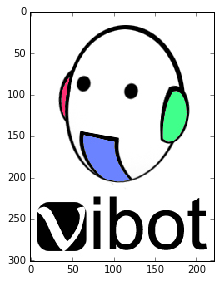

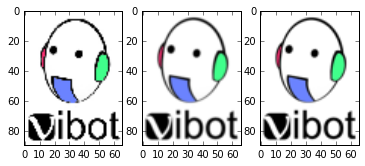

In [3]:
#plt.figure
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print ('The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype))

# Show the image
io.imshow(vibot_im)
vibot_im = img_as_float(vibot_im)

#Nearest 
m_resize_nearest = Resize(vibot_im,'nearest', 0.3)
    
#Bilinear
m_resize_bilinear = Resize(vibot_im,'bilinear', 0.3)

#Bicubic
m_resize_bicubic = Resize(vibot_im,'bicubic', 0.3)

fig = plt.figure() 

ax1 = fig.add_subplot(131)
ax1.imshow(m_resize_nearest, cmap=plt.cm.gray)
ax2 = fig.add_subplot(132)
ax2.imshow(m_resize_bilinear, cmap=plt.cm.gray)
ax3 = fig.add_subplot(133)
ax3.imshow(m_resize_bicubic, cmap=plt.cm.gray)
plt.show() 
    
    
    
  







**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


In [77]:

#If blending is simple

def my_blending_simple(image_1, image_2):
    image_1 = img_as_float(image_1)
    image_2 = img_as_float(image_2)
    output_image = np.zeros(image_1.shape)
    output_image[:, 0: output_image.shape[1]/2] =  image_1[:, 0:image_1.shape[1]/2]
    output_image[:, output_image.shape[1]/2:output_image.shape[1]] =  image_2[:, image_1.shape[1]/2:image_1.shape[1]]
    return output_image

#if method is Alpha
    
def my_blending_alpha(image_1,image_2):
    image_1 = img_as_float(image_1)
    image_2 = img_as_float(image_2) 
    alpha_window = 50
    alpha_image = np.zeros((image_1.shape[0],alpha_window*2,3))
    
     #Initialize image with simple blending 
    alpha_image[:,:,0] = alpha_image[:,:,1] = alpha_image[:,:,2] = \
    np.tile(np.linspace(0, 1, alpha_window*2, endpoint=True), (image_1.shape[0],1))

    #Performing Simple blending First
    output_image = my_blending_simple(image_1,image_2)

    #Masked the region in the center in order to achieve alpha blending
    output_image[:, int(output_image.shape[1]/2)-alpha_window:int(output_image.shape[1]/2)+alpha_window] = \
    image_1[:, int(output_image.shape[1]/2)-alpha_window:int(output_image.shape[1]/2)+alpha_window]*(1-alpha_image) + \
    image_2[:, int(output_image.shape[1]/2)-alpha_window:int(output_image.shape[1]/2)+alpha_window]*alpha_image 

    return output_image

    
    
    
    
    
    
    
    
  


Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

In [78]:
#Reading images
apple =  io.imread("./images/apple.jpeg")
orange = io.imread("./images/orange.jpeg")




Show the your answers.

In [79]:

#Calling the Function to blend the images
simple_image = my_blending_simple(orange, apple)
alpha_image = my_blending_alpha(orange, apple)

#pyramid_image = blendit(orange, apple, "pyramid")




/home/wajahat/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/wajahat/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


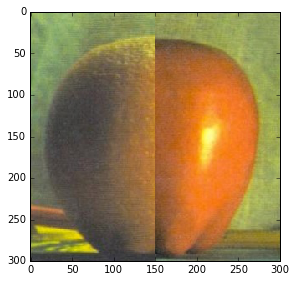

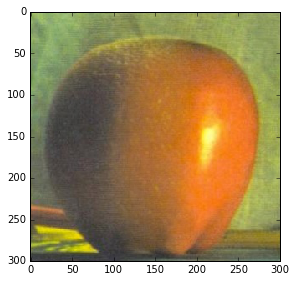

In [80]:
#ploting Simple image
io.imshow(simple_image)
io.show()
#ploting Alpha image
io.imshow(alpha_image)
io.show()
#ploting Pyramid image
#io.imshow(pyramid_image)
#io.show()